[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Positive Review Sample:
capsule : earthy , experimental , difficult , shockingly frank ( even for 1997 ! ) , and ultimately refreshing story of a black man on the run from the cops . the first few minutes of sweet sweetback's baad asssss song ( yes , i checked -- that's the correct number of ss ) are without dialogue , just eerie montages of sounds . a young boy , obviously malnourished , is taken in and fed up by several loving mother-surrogate figures . then one of them takes the boy to bed for a sexual initation ( underneath the title credits ) that's far more confrontatory and shocking than any ten basic instincts -- probably because it has the directness and clumsiness of real life , something we're not used to seeing on screen . this is one tou

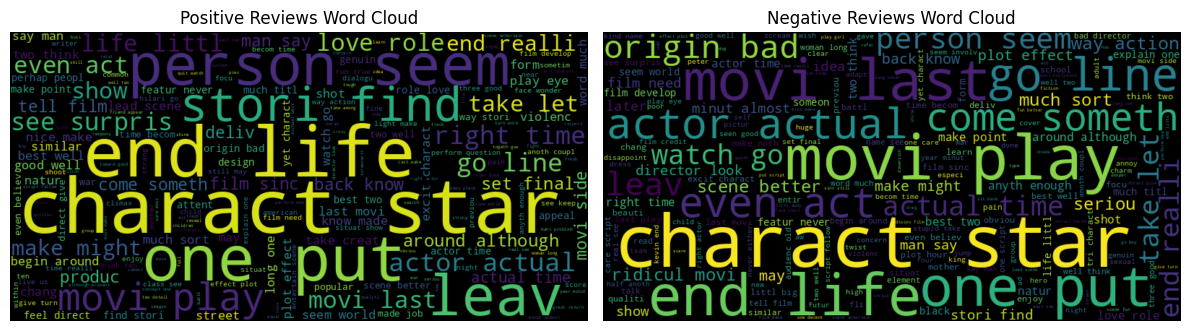

TF-IDF Feature Extraction Results:
Number of Features (Words): 26025
Shape of TF-IDF Matrix: (2000, 26025)
Training Set Shape (X_train): (1600, 26025)
Test Set Shape (X_test): (400, 26025)
Training Labels Shape (y_train): 1600
Test Labels Shape (y_test): 400
Accuracy: 0.86


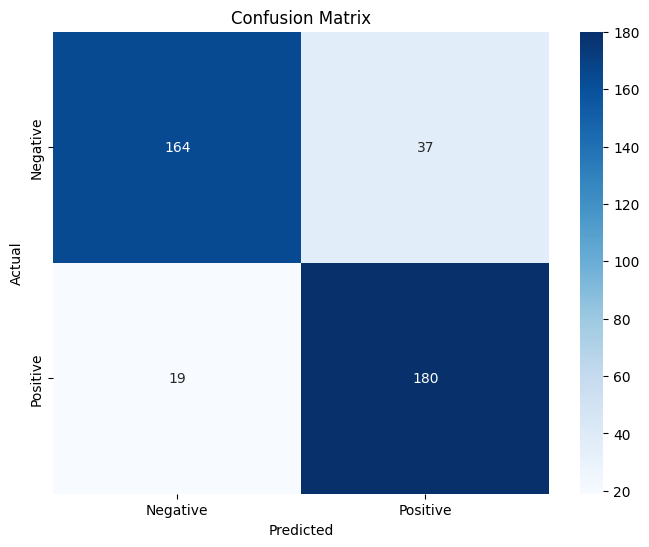

Random Forest Classifier Accuracy: 0.775


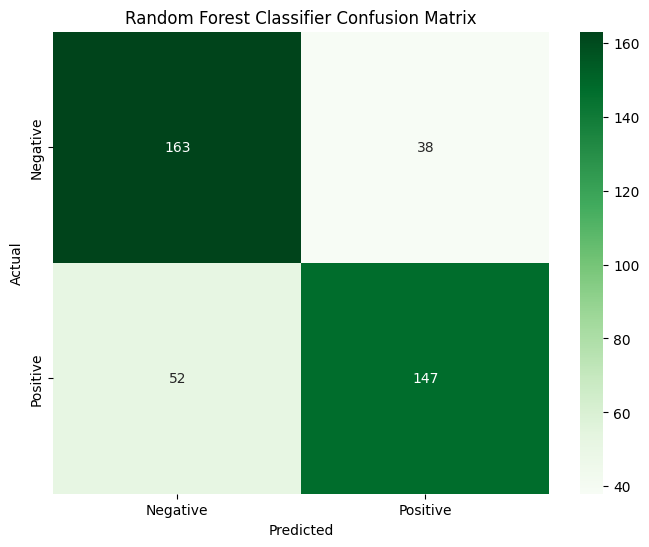

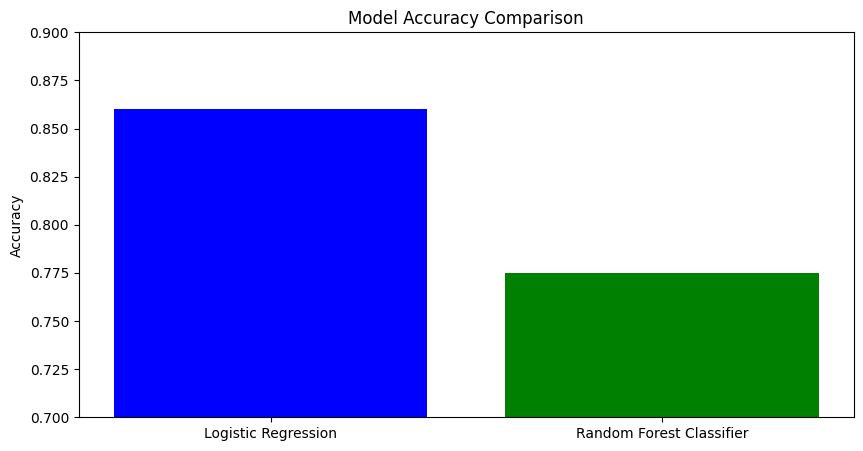

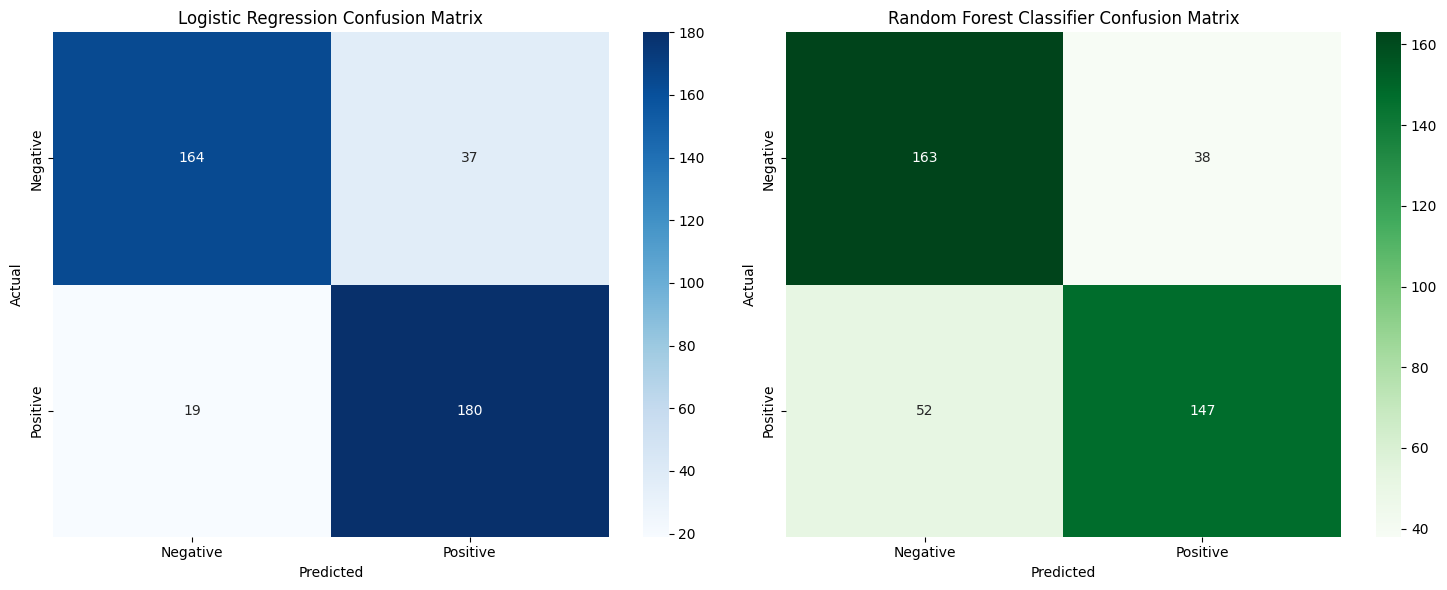

In [6]:
import os
import re
import random
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Set seed for reproducibility
random.seed(46)

# Function to preprocess a single review
def preprocess(review):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # Remove non-alphanumeric characters and convert to lowercase
    review = re.sub(r'\W+', ' ', review).lower()
    
    # Tokenize the review
    tokens = word_tokenize(review)
    
    # Remove stopwords and stem tokens
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    
    # Remove duplicate words
    filtered_tokens = list(set(filtered_tokens))
    
    # Construct the processed review string
    processed_review = ' '.join(filtered_tokens)
    
    return processed_review

# Define paths for positive and negative reviews
data_path_pos = '/kaggle/input/movie-review-data/txt_sentoken/pos'
data_path_neg = '/kaggle/input/movie-review-data/txt_sentoken/neg'

# Load positive and negative reviews
def load_reviews(data_path):
    reviews = []
    for filename in os.listdir(data_path):
        if filename.endswith('.txt'):
            with open(os.path.join(data_path, filename), 'r') as f:
                review_content = f.read().replace('\n', '')
                reviews.append(review_content)
    return reviews

positive_reviews = load_reviews(data_path_pos)
negative_reviews = load_reviews(data_path_neg)

# Preprocess positive and negative reviews
positive_reviews_processed = [preprocess(review) for review in positive_reviews]
negative_reviews_processed = [preprocess(review) for review in negative_reviews]

# Combine positive and negative reviews into a single dataset
reviews = positive_reviews_processed + negative_reviews_processed

# Create the target labels (sentiment)
sentiment = ['positive'] * len(positive_reviews_processed) + ['negative'] * len(negative_reviews_processed)

# Display sample positive and negative reviews
print("Positive Review Sample:")
print(positive_reviews[0])
print()
print("Negative Review Sample:")
print(negative_reviews[0])
print()

# Display processed sample positive and negative reviews
print("Processed Positive Review Sample:")
print(positive_reviews_processed[0])
print()
print("Processed Negative Review Sample:")
print(negative_reviews_processed[0])
print()

# Calculate number of unique words
all_words = ' '.join(reviews)
unique_words = set(all_words.split())

# Display number of unique words
print("Number of Unique Words:", len(unique_words))
print()

# Display dataset summary
print("Dataset Summary:")
print("Number of Positive Reviews:", len(positive_reviews_processed))
print("Number of Negative Reviews:", len(negative_reviews_processed))
print("Total Number of Reviews:", len(reviews))
print()

# Generate word cloud for positive reviews
positive_words = ' '.join(positive_reviews_processed)
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_words)

# Generate word cloud for negative reviews
negative_words = ' '.join(negative_reviews_processed)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_words)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# Create TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews)
y = [1] * len(positive_reviews_processed) + [0] * len(negative_reviews_processed)

# Print TF-IDF results
print("TF-IDF Feature Extraction Results:")
print("Number of Features (Words):", len(vectorizer.vocabulary_))
print("Shape of TF-IDF Matrix:", X.shape)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print feature extraction results
print("Training Set Shape (X_train):", X_train.shape)
print("Test Set Shape (X_test):", X_test.shape)
print("Training Labels Shape (y_train):", len(y_train))
print("Test Labels Shape (y_test):", len(y_test))

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Initialize and train Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest Classifier
rf_y_pred = rf_model.predict(X_test)

# Calculate accuracy for Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Display confusion matrix for Random Forest Classifier
rf_conf_mat = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

# Plotting accuracy comparison
plt.figure(figsize=(10, 5))
models = ['Logistic Regression', 'Random Forest Classifier']
accuracies = [accuracy, rf_accuracy]
colors = ['blue', 'green']

plt.bar(models, accuracies, color=colors)
plt.ylim(0.7, 0.9)  # Adjust y-axis limits for better visualization
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Display confusion matrices side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')

plt.tight_layout()
plt.show()
